# 分析氣溫與啤酒銷售量的關係

<br />  
## 動機
----
炎炎夏日，氣溫不時創新高，每天的溫度都高得嚇人，這種天氣最適合的就是窩在開冷氣的房間喝著冰啤酒看劇科科笑。  
雖然我很少喝酒，但是這幅夏天的經典場景好像有一些東西等著我去發掘。對了，為什麼覺得**熱**就要喝**冰啤酒**呢？  
那我就來探討溫度跟啤酒之間是不是存在著什麼關係好了。  
<br />  
<br />  

## 分析流程
----
>（不知道為什麼用markdown的流程圖跑不出來，下面用列點的方式） 

#### 1. 動機
#### 2. 資料收集
#### 3. 資料呈現
#### 4. 資料分析
<br />  
<br />  

## 資料收集  
----
  為了取得最正確資料，首先從政府的相關網站找起，剛好政府開放資料平台上就有[各年度國產及進口啤酒類數量表](https://data.gov.tw/dataset/25066)，  
  從民國91年到最新107年2月的國產、進口數量都有，而且是csv檔，很方便。  
  然後再找氣象局的相關網站看有沒有天氣的歷史資料，然後就找到了[觀測資料查詢系統](https://e-service.cwb.gov.tw/HistoryDataQuery/index.jsp)，  
  只要輸入相關資料就可以調出有表格的網頁，這邊我使用的是台北市2016~2017年的每月氣象資訊，分成兩個網頁。
  <br />  
  <br />  

## 資料呈現
----
以下開始使用pandas讀取csv和html的功能從網站上將資料取出，並視覺化成圖表以供比較。
比較詳細的個別解說會在程式碼的註解中。
<br />  
- ### 啤酒產量 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# -- coding: utf-8 --

beer_url = 'https://www.nta.gov.tw/opendata/D6-13_%E5%9C%8B%E7%94%A2%E5%8F%8A%E9%80%B2%E5%8F%A3%E5%95%A4%E9%85%92%E9%A1%9E%E6%95%B8%E9%87%8F%E8%A1%A8.csv'
beer = pd.read_csv(beer_url)         # 2002~2018年各月啤酒國產、進口數量（公石）
beer = beer[168:192]                 # 只看2016年1月到2017年12月

print(beer)
x = range(1,25)
y_local = beer['國產數量']
y_import = beer['進口數量']
plt.figure(figsize = (10, 5))
plt.xlabel('Months of 2016-2017')
plt.ylabel('amount')
plt.plot(x, y_local, color='blue', linewidth=3.0, linestyle='-', label='Local Beer')
plt.plot(x, y_import, color='green', linewidth=3.0, linestyle='-', label='Import Beer')
plt.legend(loc='best')
plt.show()
%matplotlib inline

      年度  月份 產品類別        國產數量       進口數量  單位
168  105   1  啤酒類  180425.652  126040.08  公石
169  105   2  啤酒類  182616.692   91409.72  公石
170  105   3  啤酒類  259652.317  155541.76  公石
171  105   4  啤酒類  273237.969  183270.32  公石
172  105   5  啤酒類  373356.341  181467.65  公石
173  105   6  啤酒類  413771.660  197522.24  公石
174  105   7  啤酒類  369641.656  209085.06  公石
175  105   8  啤酒類  419567.931  205710.99  公石
176  105   9  啤酒類  338585.398  172616.18  公石
177  105  10  啤酒類  299549.562  129832.66  公石
178  105  11  啤酒類  276662.366  125702.38  公石
179  105  12  啤酒類  279990.668   98542.63  公石
180  106   1  啤酒類  239149.991  118104.29  公石
181  106   2  啤酒類  184349.487  129910.47  公石
182  106   3  啤酒類  288155.915  169903.50  公石
183  106   4  啤酒類  256282.198  185583.86  公石
184  106   5  啤酒類  348660.615  186315.84  公石
185  106   6  啤酒類  399550.154  257030.40  公石
186  106   7  啤酒類  335623.017  185354.68  公石
187  106   8  啤酒類  487504.546  205869.57  公石
188  106   9  啤酒類  358819.752  157527.04  公石
189  106  

<Figure size 1000x500 with 1 Axes>

- 上圖是2016到2017年每個月的啤酒進口/生產量，藍色線是國產啤酒，綠色線是進口啤酒，  
  一定程度的反映出當月的啤酒銷售熱度，而且可以觀察到每年有一定的**週期循環**，使得此議題更加值得探討。  
<br />  
<br />  
----
以下開始將歷史氣溫圖形化，使用pandas的read_html功能，並利用matplotlib將資料做成表格。
- ### 當月均溫、最高溫與最低溫

         0     7     8     10
2   2016-01  15.3  25.8   2.9
3   2016-02   NaN  31.5   5.9
4   2016-03  16.9  29.2   8.5
5   2016-04  23.1  34.0  16.1
6   2016-05  26.1  36.4  17.3
7   2016-06  28.6  37.9  23.2
8   2016-07  29.7  39.2  23.9
9   2016-08  29.4  36.9  23.7
10  2016-09  27.1  35.1  22.8
11  2016-10  26.3  35.0  20.8
12  2016-11  22.1  33.2  16.5
13  2016-12  19.6  30.8  11.6
2   2017-01  17.7  27.8  11.3
3   2017-02  16.5  28.6   9.8
4   2017-03  17.8  29.8  11.4
5   2017-04  22.1  34.9  10.8
6   2017-05  25.1  34.8  18.9
7   2017-06  27.8  36.3  21.2
8   2017-07  30.2  37.9  22.9
9   2017-08  30.7  39.0  25.5
10  2017-09  28.6  37.7  22.7
11  2017-10  24.8  36.7  17.6
12  2017-11  21.5  31.4  15.4
13  2017-12  17.0  25.0  12.4


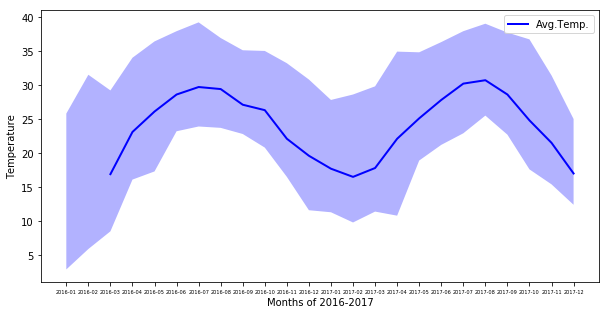

In [3]:
weather2017_url = 'https://e-service.cwb.gov.tw/HistoryDataQuery/YearDataController.do?command=viewMain&station=C0AC70&stname=%25E4%25BF%25A1%25E7%25BE%25A9&datepicker=2017'
weather2017 = pd.read_html(weather2017_url)[-1]
weather2017 = weather2017.drop(weather2017.columns[[0,1]])  # 去掉前兩row (亂碼)
weather2017 = weather2017.iloc[0:14,[0,7,8,10]]             # 只選取1~12月的溫度相關資料
weather2017[7] = weather2017[7].astype(float)               # turn string into float
weather2017[8] = weather2017[8].astype(float)
weather2017[10] = weather2017[10].astype(float)

weather2016_url = 'https://e-service.cwb.gov.tw/HistoryDataQuery/YearDataController.do?command=viewMain&station=C0AC70&stname=%25E4%25BF%25A1%25E7%25BE%25A9&datepicker=2016'
weather2016 = pd.read_html(weather2016_url)[-1]
weather2016 = weather2016.drop(weather2016.columns[[0,1]])  # 去掉前兩row (亂碼)
weather2016 = weather2016.iloc[0:14,[0,7,8,10]]             # 只選取1~12月的溫度相關資料
weather2016.replace('X' ,np.nan, inplace=True)              # 有一個值為'X'，改成NaN才能轉成float
weather2016[7] = weather2016[7].astype(float)               # turn string into float
weather2016[8] = weather2016[8].astype(float)
weather2016[10] = weather2016[10].astype(float)

weather = pd.concat([weather2016, weather2017], axis=0)     # merge 2016 & 2017
print(weather)
x = weather[0]      # 月份
y = weather[7]      # 均溫
y_high = weather[8] # 當月最高溫
y_low = weather[10] # 當月最低溫
plt.figure(figsize=(10,5))
plt.xticks(fontsize=5)
plt.xlabel('Months of 2016-2017')
plt.ylabel('Temperature')
plt.plot(x, y, color='blue', linewidth=2.0, linestyle='-', label='Avg.Temp.')
plt.fill_between(x, y_high, y_low, facecolor = 'blue', alpha=0.3)    # 將最高溫和最低溫區間填色
plt.legend(loc='best')
plt.show()

- 上圖是2016年到2017年台北觀測到的每月氣溫資料，中間藍色的線為當月平均溫度，而藍色的帶狀部分是由當月最高溫和當月最低溫所構成。  
從這張圖和上面啤酒產量倆倆比較下已經可以看出兩者間有著一定的相似性，所以接下來將兩張圖的重要不分重疊，看看是否能找出什麼。
  
----
- ### 將兩張圖表合併比較
將兩張有不同Y軸單位的圖表重疊，來看看是不是跟想像中的一樣。

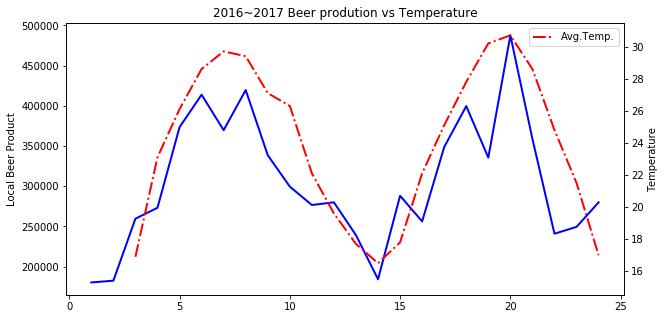

In [4]:
x = range(1,25)
y1 = beer['國產數量']
y2 = weather[7]

ax1 = plt.figure(figsize=(10,5)).add_subplot(111)
ax1.plot(x, y1,color='blue', linewidth=2.0, linestyle='-', label='Local Beer')
ax1.set_ylabel('Local Beer Product')
ax1.set_title("2016~2017 Beer prodution vs Temperature")

ax2 = ax1.twinx()
ax2.plot(x, y2, color='red', linewidth=2.0, linestyle='-.', label='Avg.Temp.')
ax2.set_ylabel('Temperature')
ax2.set_xlabel('Month of 2016~2017')

plt.legend(loc='best')

plt.show()

<br />  

## 資料分析
----
經過重疊後，
## !!!! 溫度與啤酒產量竟然呈現有點完美的相同趨勢 !!!
而且平均溫度越高啤酒的生產量也呈現越高的趨勢，兩者根本就是在搞曖昧，形影不離。  
因為圖中有兩年的資料的關係，所以圖形呈現雙峰，分別是2016年和2017年的夏天，炎熱的天氣就讓人想喝上幾瓶啤酒消暑，  
而低谷的部份就是我們冷到發抖的那幾個月，這時候誰還想喝啤酒（相對少啦），當然是灌個幾杯伏特加比較有用。
<br />  
<br />  
雖然有些人看到這份分析可能會說「嗯嗯，跟我想的一樣」，但真正將資料抓出來、重疊視覺化又是另一回事了。  
將資料正真的做成圖表和表格提供了一個強而有力的證據來證明這個想法，來證明溫度與啤酒銷量的關係。

----


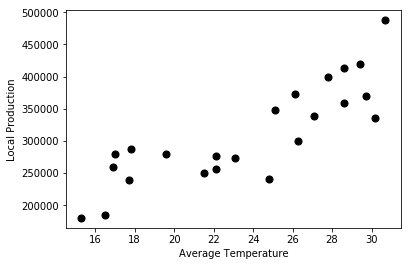

In [5]:
x = weather[7]
y = beer['國產數量']
plt.scatter(x, y, s=50, color='black')
plt.xlabel('Average Temperature')
plt.ylabel('Local Production')
plt.show()

- 上圖將X:平均溫度、Y:產量做成點圖，也可以發現兩者存在線性關係。
----
甚至可以提供給銷售商或製造商作為生產進貨的參考依據，如果更閒的話，還能收集更多資料做成迴歸分析，  
以後只要看氣象預報就能決定啤酒產量了！超方便的。